# 初始化

In [1]:
from lib.data import *
import matplotlib.pyplot as plt
code = "600893"
features = {'IncomeFeature':{},'MaFeature':{'timeperiod':[5,10]},
            'CloseAndVolumeDiffFeature':{}, 'EMAFeature':{'timeperiod':[5,10]},
            'MACDFeature':{},'MFIFeature':{}}
# features = {'MaFeature':{'timeperiod':[5,10]},'IncomeFeature':{}}
include_col_names = None
exclude_col_names = None
def load_data():
    local_data = None
    for idx, fkey in  enumerate(features.keys()):
        print('add  features  -->', fkey)
        f = globals()[fkey](code,data=local_data,**features[fkey])
        # f = fitem(self.code, data=local_data)
        f.add_feature()
        if idx == len(features) - 1:
            local_data = f.get_data(include_col_names=include_col_names, exclude_col_names=exclude_col_names)
        else:
            local_data = f.get_data()
    return local_data

def show_stock(data, labels=None, time_arange=['2018','2019'], y_label='time'):
    plt.figure(figsize=(14, 7), dpi=100)
    p_data = data[time_arange[0]:time_arange[1]]
    p_buy_state = [ idx  for idx, x in enumerate(p_data['FLAG'].tolist()) if x == 1]
   
    if labels is not None:
        for item in labels:
            plt.plot(p_data[item],  label=item)
    plt.plot(p_data.Close, '^', markersize=10, color='m', label = 'buying signal', markevery=p_buy_state)
    plt.legend()
    plt.show()
    
data = load_data()
data.head(5)

add  features  --> IncomeFeature
add  features  --> MaFeature
add  features  --> CloseAndVolumeDiffFeature
add  features  --> EMAFeature
add  features  --> MACDFeature
add  features  --> MFIFeature


,Open,High,Close,Low,Volume,Amount,INCOME,OUTCOME,FLAG,MA5,...,DHC,DOC,DLC,DCC,DAA,DVV,EMA5,EMA10,MACD,MFI
2005-04-15,4.32,4.69,4.62,4.29,9183403,4183647.2,1.731602,-21.645022,0,-0.246,...,1.515152,-6.493506,-7.142857,5.844156,0.487999,0.471170,-0.196059,-0.261297,0.006807,4.288173
2005-04-18,4.62,4.76,4.70,4.46,6550762,3031664.0,-10.000000,-24.893617,0,-0.260,...,1.276596,-1.702128,-5.106383,1.702128,-0.379984,-0.401883,-0.184040,-0.279243,0.019018,4.291259
2005-04-19,4.69,4.69,4.23,4.23,7230703,3146265.0,-9.219858,-16.548463,0,0.210,...,10.874704,10.874704,0.000000,-11.111111,0.036424,0.094035,0.190640,0.156074,-0.005808,4.264310
2005-04-20,4.14,4.17,3.84,3.81,6393731,2488776.4,-4.687500,-8.072917,0,0.508,...,8.593750,7.812500,-0.781250,-10.156250,-0.264181,-0.130905,0.387094,0.446788,-0.047429,4.155167
2005-04-21,3.85,3.86,3.62,3.51,5054562,1835268.6,1.104972,-7.182320,0,0.582,...,6.629834,6.353591,-3.038674,-6.077348,-0.356083,-0.264943,0.404729,0.545554,-0.086436,4.021921


# Fourier transforms 

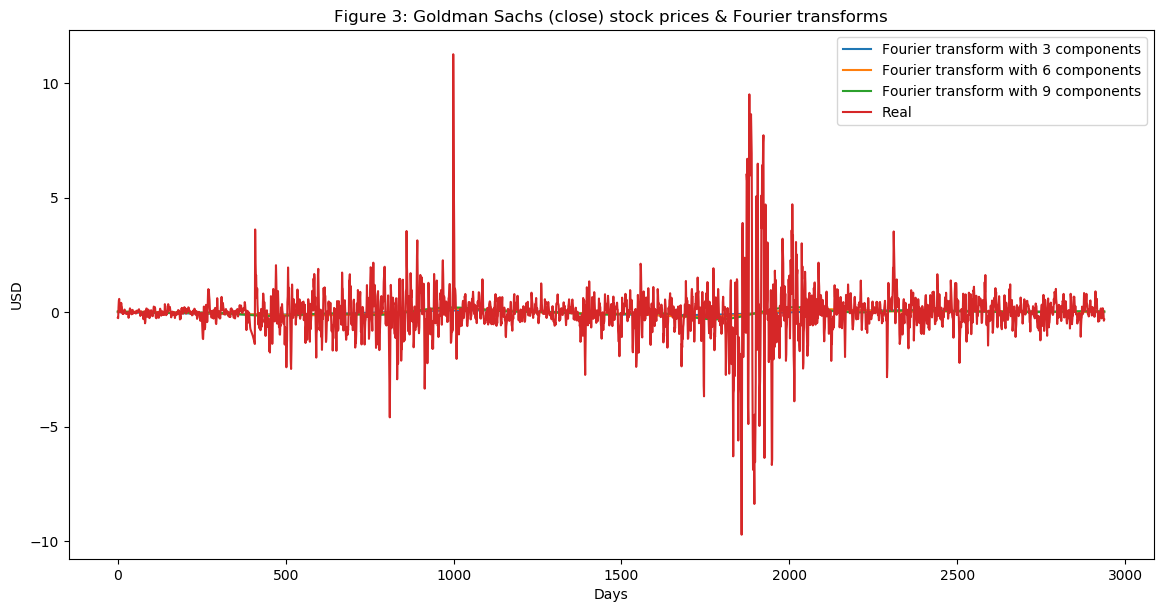

In [9]:
import numpy as np
close_fft = np.fft.fft(np.asarray(data['MA5'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9]:
    fft_list_m10= np.copy(fft_list); 
    fft_list_m10[num_:-num_]=0   # ?????
    if num_ == 9:
        data['fft'] =  np.fft.ifft(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data['MA5'].tolist(),  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Goldman Sachs (close) stock prices & Fourier transforms')
plt.legend()
plt.show()    
# show_stock(data, labels=['Close'],time_arange=['2019-01','2019-11'])


In [95]:
close_fft

array([ 68697.78      -1.11022302e-13j,  -7582.9087231 +1.28561057e+04j,
       -13258.74264258-1.65323667e+03j, ...,
         6148.14946165-9.01547980e+03j, -13258.74264258+1.65323667e+03j,
        -7582.9087231 -1.28561057e+04j])

In [108]:
??np.angle

# PCA

## ARIMA 

In [15]:
'''
？？？？？？
1、 https://www.jianshu.com/p/91a931d8d92f
2、 https://www.jianshu.com/p/f547bb4b50c3  用ARIMA模型做需求预测
         ARIMA模型的全称叫做自回归移动平均模型，全称是(Autoregressive Integrated Moving Average Model)。是统计模型(statistic model)中最常见的一种用来
    进行时间序列预测的模型。
        ARIMA is a technique for predicting time series data.  ARIMA will not serve as our final prediction, we will use it as a 
    technique to denoise the stock a little and to (possibly) extract some new patters or features.We will use the predicted price 
    through ARIMA as an input feature into the LSTM because （我们可以用ARIMA预测的价格做为一个LSTM训练数据的特征）, as we mentioned before, 
    we want to capture as many features and patterns about Goldman Sachs as possible. We go test MSE (mean squared error) of 10.151, which 
    by itself is not a bad result (considering we do have a lot of test data), but still we will only use it as a feature in the LSTM.
'''
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime
series = data.Close.values
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2938
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3978.818
Method:                       css-mle   S.D. of innovations              0.937
Date:                Tue, 07 Apr 2020   AIC                           7971.635
Time:                        15:21:55   BIC                           8013.533
Sample:                             1   HQIC                          7986.722
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.021      0.265      0.791      -0.035       0.046
ar.L1.D.y      0.1252      0.018      6.786      0.000       0.089       0.161
ar.L2.D.y      0.0103      0.019      0.554      0.5

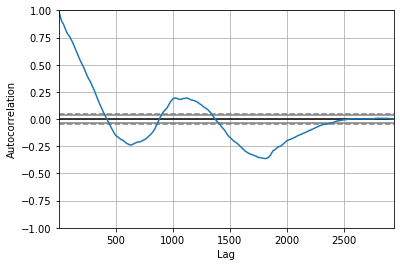

<Figure size 800x560 with 0 Axes>

In [17]:
# ？ 这是做什么用的？？？
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

Test MSE: 0.606


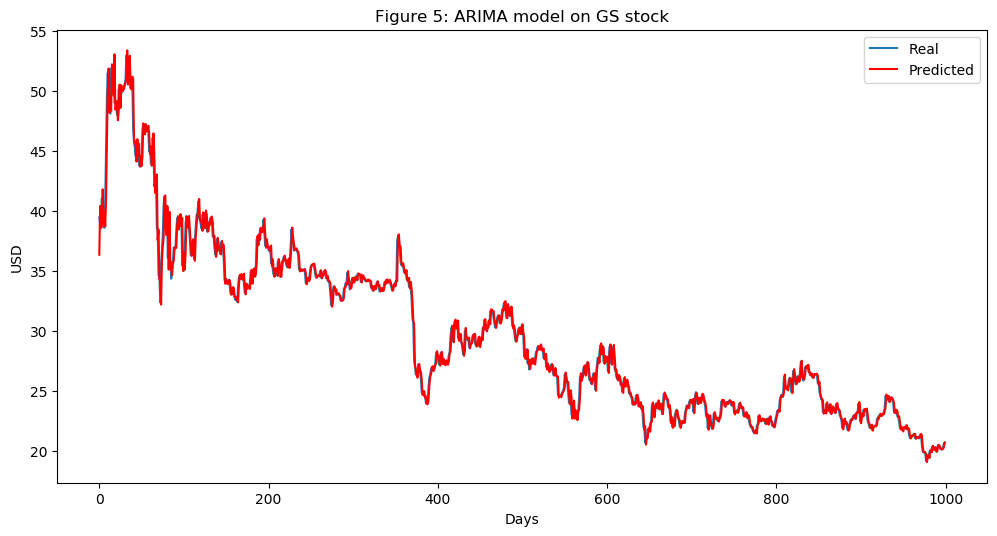

In [20]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = data.Close.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on GS stock')
plt.legend()
plt.show()

## Statistical checks

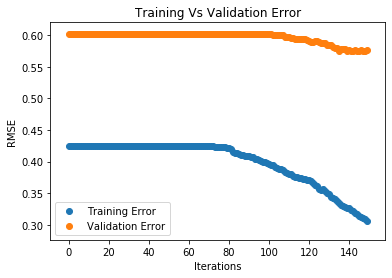

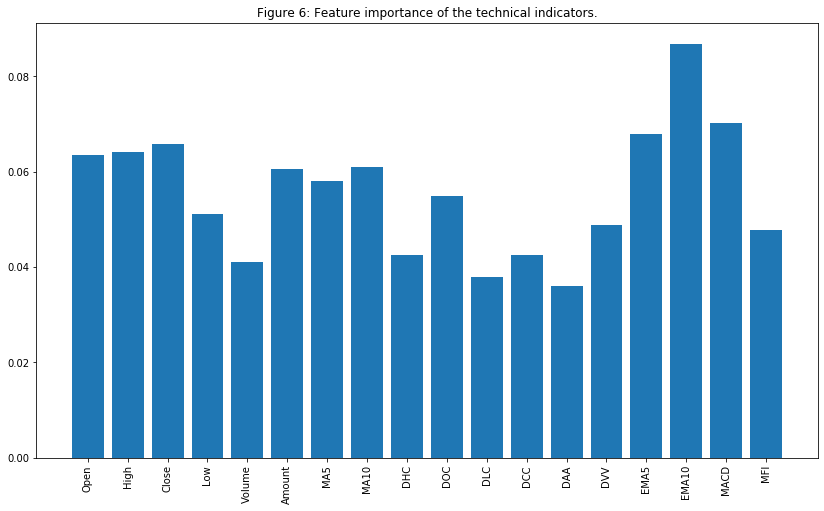

In [11]:
'''
1、https://xgboost.readthedocs.io/en/latest/
2、https://blog.csdn.net/edogawachia/article/details/79357844 随机森林（Random Forest）算法原理

    Ensuring that the data has good quality is very important for our models. In order to make sure our data is 
suitable we will perform a couple of simple checks in order to ensure that the results we achieve and observe are 
indeed real, rather than compromised due to the fact that the underlying data distribution suffers from fundamental 
errors.
'''
import xgboost as xgb
# Feature importance with XGBoost 
def get_feature_importance_data(data_income):
    data = data_income.copy()
    cm = data.columns.get_level_values(0)
#     sel_cm = ' & '.join(['''(cm != '{}')'''.format(x) for x in exclude_col_names])
#     sel_cm = eval(sel_cm)
#     y = data.Close.shift(-1)
    y = data['FLAG']
    X = data.iloc[:, (cm != 'INCOME')  & (cm != 'OUTCOME') & (cm != 'FLAG')]
#     print(X.head(10))
    train_samples = int(X.shape[0] * 0.65)
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]
    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    return (X_train, y_train), (X_test, y_test)
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data)
# print(X_train_FI.tail(5))
# print(y_train_FI.tail(5))
# print(X_train_FI)
# regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
regressor = xgb.XGBClassifier(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.01,booster='gbtree')
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

eval_result = regressor.evals_result()
# print(eval_result)
training_rounds = range(len(eval_result['validation_0']['error']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['error'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['error'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

fig = plt.figure(figsize=(14,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

In [28]:
'''
PCA 降维
1、https://blog.csdn.net/it_a_question/article/details/78751160  sklearn中PCA的使用方法
2、https://www.cnblogs.com/youngsea/p/9334773.html Sklearn实现主成分分析（PCA）
3、https://www.jianshu.com/p/d92da81ae613 
4、https://www.jianshu.com/p/75e805ff247c
'''
# Eigen portfolio with PCA  PCA 主成分
from sklearn.decomposition import PCA
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# We want the PCA to create the new components to explain 80% of the variance
pca_data = data.copy()
cm = pca_data.columns.get_level_values(0)
pca_data = pca_data.iloc[:, (cm != 'INCOME')  & (cm != 'OUTCOME') ]
pca = PCA(n_components=.8)
x_pca = StandardScaler().fit_transform(pca_data)
principalComponents = pca.fit_transform(x_pca)
print(pca.explained_variance_ratio_)
print(pca.n_components_)
print(pca_data.shape)
pca_data.head(5)

[0.29940439 0.2473009  0.111599   0.09950891 0.07622197]
5
(2939, 19)


,Open,High,Close,Low,Volume,Amount,FLAG,MA5,MA10,DHC,DOC,DLC,DCC,DAA,DVV,EMA5,EMA10,MACD,MFI
2005-04-15,4.32,4.69,4.62,4.29,9183403,4183647.2,0,-0.246,-0.245,1.515152,-6.493506,-7.142857,5.844156,0.487999,0.471170,-0.196059,-0.261297,0.006807,4.288173
2005-04-18,4.62,4.76,4.70,4.46,6550762,3031664.0,0,-0.260,-0.283,1.276596,-1.702128,-5.106383,1.702128,-0.379984,-0.401883,-0.184040,-0.279243,0.019018,4.291259
2005-04-19,4.69,4.69,4.23,4.23,7230703,3146265.0,0,0.210,0.164,10.874704,10.874704,0.000000,-11.111111,0.036424,0.094035,0.190640,0.156074,-0.005808,4.264310
2005-04-20,4.14,4.17,3.84,3.81,6393731,2488776.4,0,0.508,0.501,8.593750,7.812500,-0.781250,-10.156250,-0.264181,-0.130905,0.387094,0.446788,-0.047429,4.155167
2005-04-21,3.85,3.86,3.62,3.51,5054562,1835268.6,0,0.582,0.636,6.629834,6.353591,-3.038674,-6.077348,-0.356083,-0.264943,0.404729,0.545554,-0.086436,4.021921
